## STAT 135 LAB 4

### Ishaan Srivastava

In this lab report, we analyse different possible relationships between snow pack density and gain, the latter of which refers to an amplified version of the gamma photon count made by a piece of equipment known as a snow gauge. The gauge is used to determine the depth profile of snow density. The data are from a calibration run of a snow gauge in the Sierra Nevada mountains range in California, wherein polyethylene blocks (used to simulate snow) of known densities were placed between between two poles of the snow gauge and the corresponding readings were recorded. It is crucial to note that this experiment involved varying density and measuring the corresponding change in gain but in a real world setting where the snow gauge is actually being used, the snow-pack density is to be estimated from the measured gain. As such, the goal is to find a straightforward way of converting gain to density when the gauge is in operation. Returning to the topic at hand, the data available for investigation consist of 10 measurements for each of 9 densities in grams per cubic centimeter $(\frac{g}{cm^3})$ of polyethylene. For further background information about snow gauges and the data, refer to Chapter 8 of "Stat Labs: Mathematical Statistics Through Applications" by Deborah Nolan and Terry Speed.

We begin by analysing a scatterplot of the two variables, plotted below.

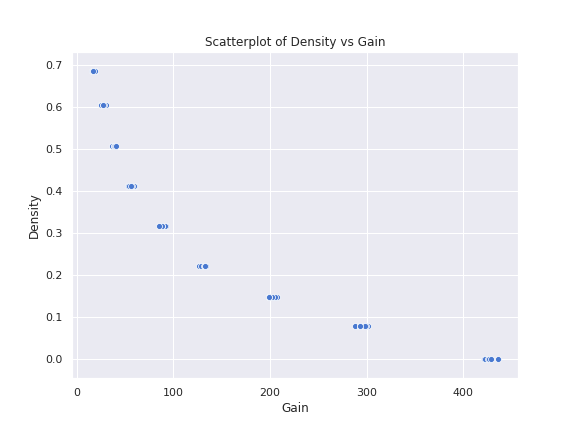

In [53]:
Image("Figure 1.png")

As we can see above, the relationship between the variables in their current form is clearly nonlinear. As such, we should apply some nonlinear transformation to at least one of our variables in order to try obtaining a linear relationship between the transformed variables. Based on the exponential nature of the plot, I decided to take the log of gain (without transforming density). The plot is available below, with the least squares line plotted in red).

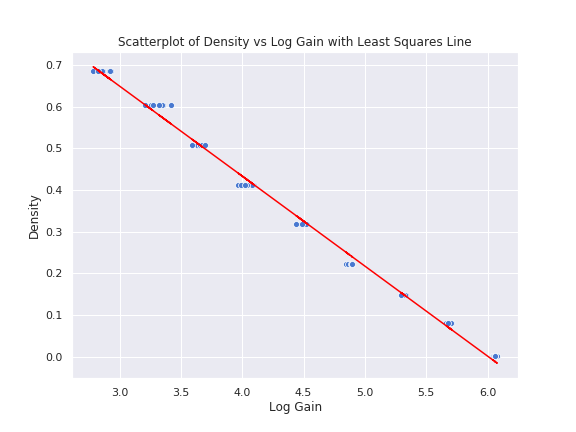

In [286]:
Image("Figure 2.png")

At first glance, this linear model looks very promising, with an $R^2$ value of 0.996, suggesting an almost perfect linear relationship between density and log gain. However to ensure no assumptions of linear regression were being violated, I also examined the residuals, plotted below.

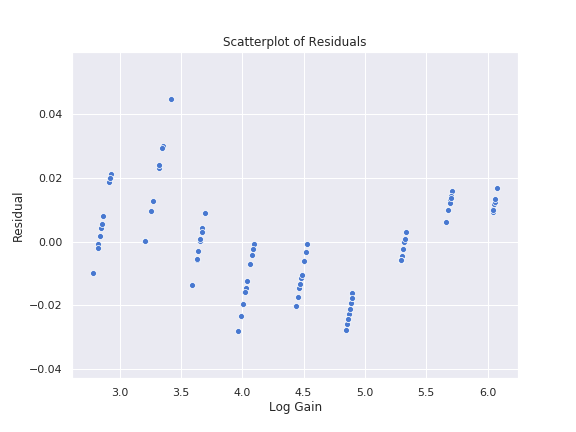

In [287]:
Image("Figure 3.png")

We see that the residuals fail checks for homoscedasticity and linearity; there is also a nonlinear pattern to the residuals. As such, even though the least squares line seems like an excellent fit both visually and in terms of its high $R^2$ value, the assumptions of linear regression and a linear model are not satisfied here. Given the nature of the data, this makes sense: we had 9 blocks of known densities for which we recorded gain 10 times each and since we plotted density vs. gain and density vs. log gain, this means there are multiple points with different values on the x-axis having the same y value, which would help explain the nature of some of the residuals and why they fail checks for linearity and heteroscedasticity.

As covered in lecture and Page 172 of "Stat Labs: Mathematical Statistics Through Applications", we know that the variance in prediction errors is given by the formula $Var(y - \hat{y}) = \sigma^2[1 + \frac{1}{m} + \frac{(x - \bar{x})^2}{\Sigma(x_i - \bar{x})^2}]$ where $y$ is the true value, $\hat{y}$ is our prediction, and $m$ is the number of distinct values. Using this formula, we can come up with prediction intervals for our predicitions at each point, which we call prediction bands. For a simple linear model having fitted intercept $\hat{\theta_0}$ and slope $\hat{\theta_1}$, a 95% prediction interval for a given each point $x$ can be expressed as $(\hat{\theta_0} + \hat{\theta_1}x) \space \pm z_{0.975} \space \hat{\sigma}[1 + \frac{1}{m} + \frac{(x - \bar{x})^2}{\Sigma(x_i - \bar{x})^2}]^{\frac{1}{2}}$, where $\hat{\sigma} = (\frac{1}{n-1}\Sigma_{i = 1}^n (y_i - \hat{y_i})^2)^{\frac{1}{2}}$. These bands have been calculated and plotted below in gold. Note that in the calculations and plot, we have omitted the measurements with density 0.508 $\frac{g}{cm^3}$ as per the lab spec. We are also asked to provide an interval estimate for density for an average gain reading of 38.6. log(38.6) = 3.65, and so our prediction interval is [0.30, 0.71]. Note: All figures are rounded to 2 decimal places for convenience. As we can see below, the prediction bands are tightest at $x = \bar{x}$ and are tighter around this region than elsewhere in the plot.

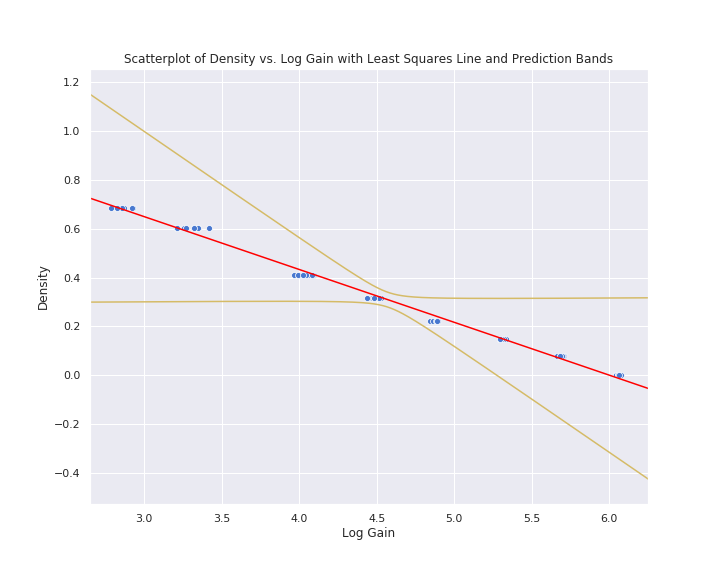

In [292]:
Image("Figure 4.png")

Earlier in this report, we discussed how the nonlinear residuals may be caused by the fact that we have multiple gain readings for fixed density, meaning a plot where gain (or a transformation of gain) is plotted on the x axis with density on the y axis will have some issues since different x values will have the same y value. To help combat this, we flip the axes with density on the x axis and log(gain) on the y axis. Since we noticed a nonlinear pattern in the residuals in our earlier model, we decide to add a quadtratic term to density, meaning our model is equivalent to fitting a polynomial of degree 2. Note that this model is still linear because it's linear in the model parameters. The corresponding plots (including residuals) are plotted below, with the least squares line plotted in purple.

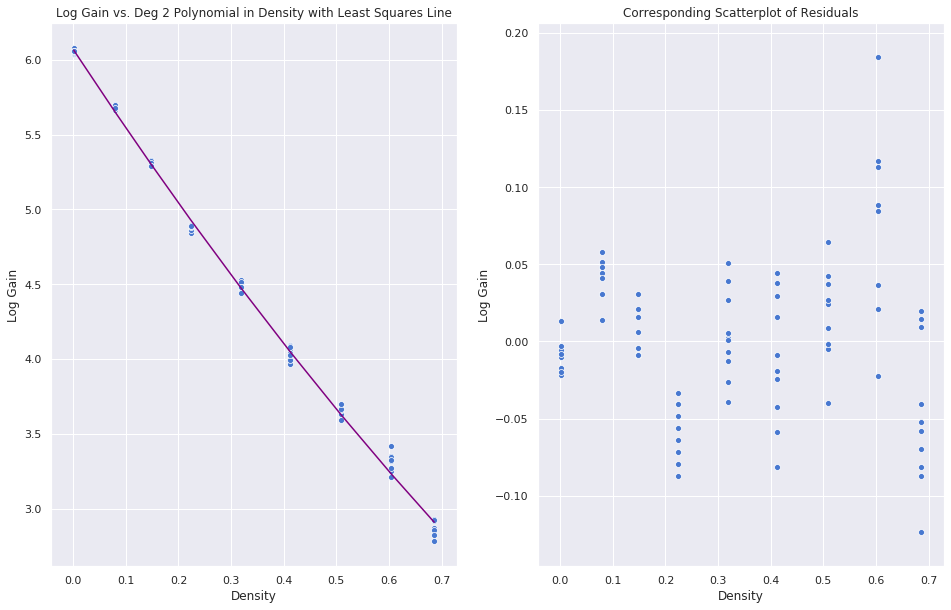

In [320]:
Image("Figure 5.png")

The analogous plots for the simpler log-linear (log gain vs density) model are provided below. Once again, the least squares line is provided in purple.

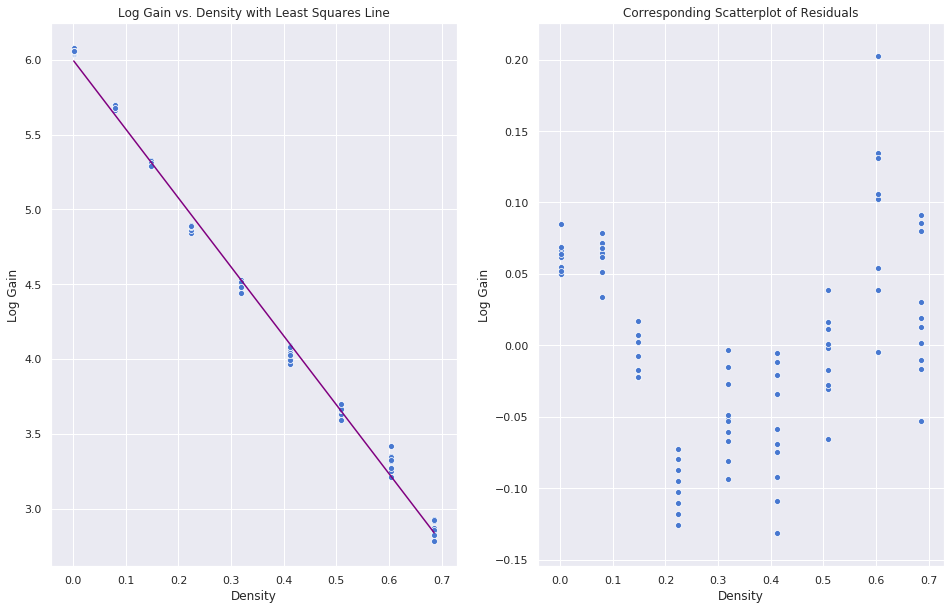

In [321]:
Image("Figure 6.png")

We now compare the two models on a variety of metrics. The polynomial fit has a higher $R^2$ value (0.998 vs. 0.996) and a lower RMSE (0.049 vs. 0.067). In terms of the residual plot, both plots have the same x values, hence they are equally heteroscedastic and we do not prefer one model to another on this basis. However, the linearity of residuals is not equal for both models. We see that for most densities, the residuals of the polynomial fit are distributed more evenly around 0 and have an average closer to 0 as compared to our simple log-linear plot, meaning that on the basis of residuals, the polynomial fit obeys the assumptions of a linear model and linear regression better. We also use our domain knowledge here: while the textbook suggests an exponential relationship between gain and density, meaning a log-linear model should be a good fit, the authors simultaneously acknowledge that this is a deliberately simplified model, and that the real relationship is more complex. Therefore it is not unreasonable to assume there are quadratic terms involved in the relationship between the variables. As such, I recommend the polynomial fit as the model we should accept because as mentioned earlier, it has higher $R^2$, lower RMSE, greater linearity of residuals, and is consistent (or at at the very least not inconsistent) within the context of domain knowledge. With that, we conclude our exploration of the relationship between snow pack density and gain as measured by snow gauges.

In [293]:
%%latex
\newpage

<IPython.core.display.Latex object>

In [294]:
##

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
from IPython.display import Image
sns.set(palette='muted')

In [296]:
gauge = pd.read_csv("gauge.data", sep = "\s+")

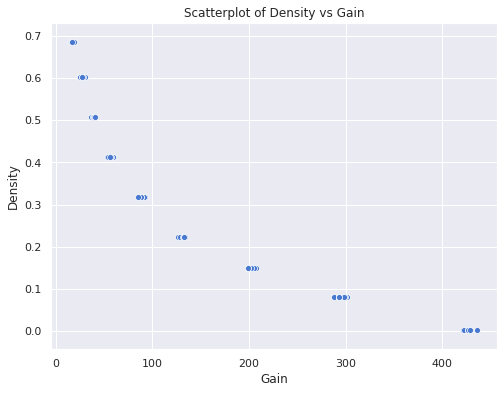

In [297]:
plt.figure(figsize = (8,6))
sns.scatterplot(gauge["gain"], gauge["density"]);
plt.xlabel("Gain")
plt.ylabel("Density")
plt.title("Scatterplot of Density vs Gain")
plt.savefig("Figure 1.png");

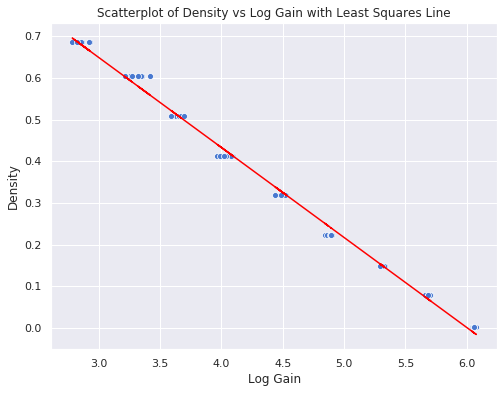

In [298]:
plt.figure(figsize = (8,6))
gauge["log gain"] = np.log(gauge["gain"])
gauge["bias"] = 1
X, y = gauge[["log gain", "bias"]], gauge["density"]
model = lm.LinearRegression(fit_intercept=False)
model.fit(X, y)
sns.scatterplot(gauge["log gain"], y)
plt.plot(gauge["log gain"], model.predict(X), "red");
plt.xlabel("Log Gain")
plt.ylabel("Density")
plt.title("Scatterplot of Density vs Log Gain with Least Squares Line")
plt.savefig("Figure 2.png");

In [299]:
model.score(X,y)

0.995818302485479

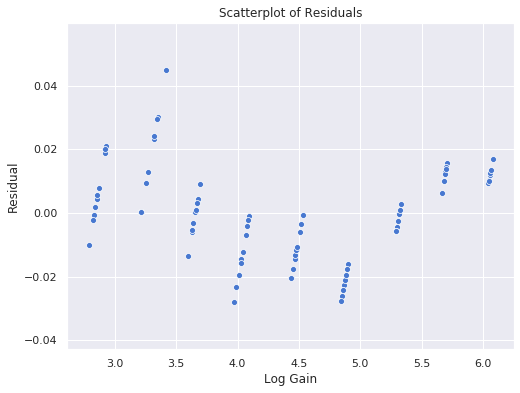

In [300]:
plt.figure(figsize = (8,6))
sns.scatterplot(gauge["log gain"], y - model.predict(X))
plt.xlabel("Log Gain")
plt.ylabel("Residual")
plt.title("Scatterplot of Residuals")
plt.savefig("Figure 3.png");

In [301]:
X_inter = gauge[gauge["density"] != 0.508]
X_inter

,density,gain,log gain,bias
0,0.686,17.6,2.867899,1
1,0.686,17.3,2.850707,1
2,0.686,16.9,2.827314,1
3,0.686,16.2,2.785011,1
4,0.686,17.1,2.839078,1
...,...,...,...,...
85,0.001,427.0,6.056784,1
86,0.001,426.0,6.054439,1
87,0.001,428.0,6.059123,1
88,0.001,427.0,6.056784,1


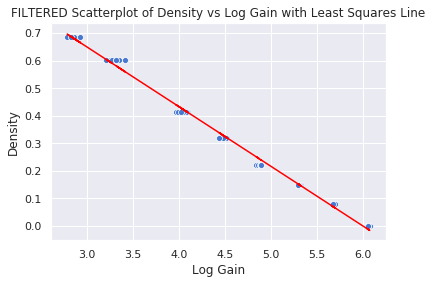

In [302]:
X_filtered, y_filtered = X_inter[["log gain", "bias"]], X_inter["density"]
model_filtered = lm.LinearRegression(fit_intercept=False)
model_filtered.fit(X_filtered, y_filtered)
sns.scatterplot(X_filtered["log gain"], y_filtered)
plt.plot(X_filtered["log gain"], model_filtered.predict(X_filtered), "red");
plt.xlabel("Log Gain")
plt.ylabel("Density")
plt.title("FILTERED Scatterplot of Density vs Log Gain with Least Squares Line")
#plt.savefig("Figure 2.png");
predict_boi = pd.DataFrame({"x values": np.linspace(2.6,6.3,1000), "Bias": 1})

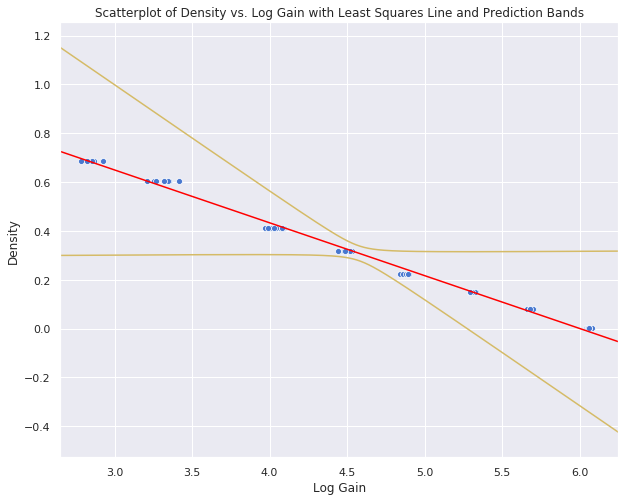

In [303]:
plt.figure(figsize=(10,8))
mean_boi = np.mean(X_filtered["log gain"])
denom = np.sum((model_filtered.predict(X_filtered) - y_filtered)**2)
sigma_est = np.sqrt(1/(len(X_filtered) - 1)*denom)
predictions = model_filtered.predict(predict_boi)
predict_band = 1.96 * sigma_est * np.sqrt(1 + 1/len(np.unique(X_filtered["log gain"])) + (np.linspace(2.6,6.3,1000) - mean_boi)**2/denom)
plt.plot(np.linspace(2.6,6.3,1000), predictions + predict_band, "y")
plt.plot(np.linspace(2.6,6.3,1000), predictions, "red")
plt.plot(np.linspace(2.6,6.3,1000), predictions - predict_band, "y");
sns.scatterplot(X_filtered["log gain"], y_filtered);
plt.xlim(2.65,6.25)
plt.xlabel("Log Gain")
plt.ylabel("Density")
plt.title("Scatterplot of Density vs. Log Gain with Least Squares Line and Prediction Bands");
plt.savefig("Figure 4.png")

In [304]:
(model_filtered.coef_[0] * np.log(38.6) + model_filtered.coef_[1]) + np.array([-1,1]) * 1.96 * sigma_est * np.sqrt(1 + 1/len(np.unique(X_filtered["log gain"])) + (np.log(38.6) - mean_boi)**2/denom)

array([0.30283878, 0.71376864])

In [305]:
np.log(38.6)

3.653252276470785

In [306]:
gauge["density^2"] = gauge["density"]**2
#gauge["density^3"] = gauge["density"]**3

In [307]:
X_polynomial,y_polynomial = gauge[["bias", "density", "density^2"]], np.log(gauge["gain"])

In [308]:
model_polynomial = lm.LinearRegression(fit_intercept=False)

In [309]:
model_polynomial.fit(X_polynomial,y_polynomial)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

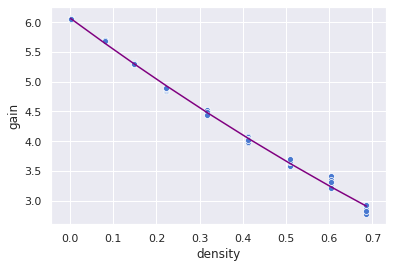

In [310]:
sns.scatterplot(gauge["density"], y_polynomial)
plt.plot(gauge["density"], model_polynomial.predict(X_polynomial), "purple")

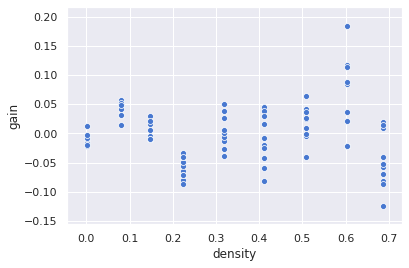

In [311]:
sns.scatterplot(gauge["density"], y_polynomial - model_polynomial.predict(X_polynomial))

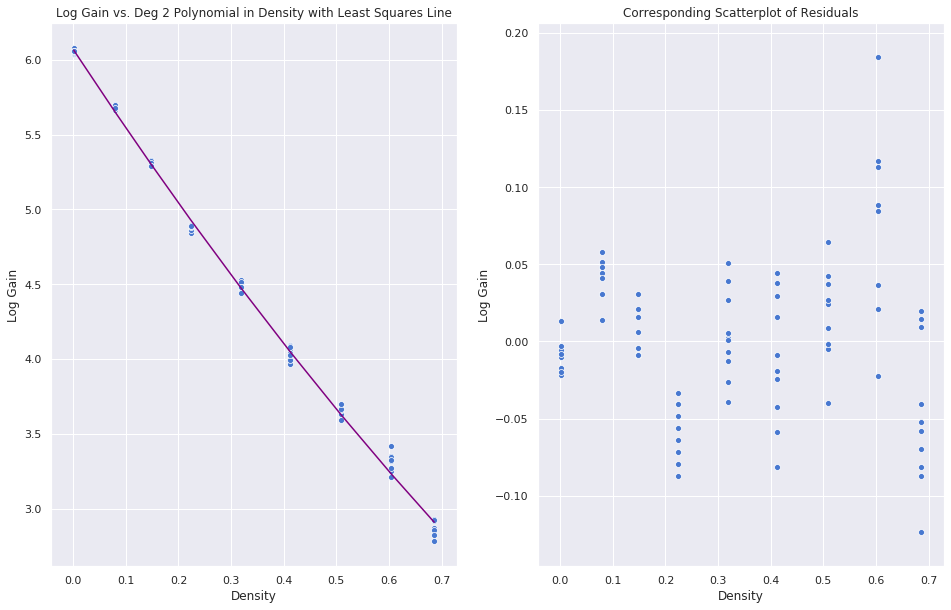

In [312]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.scatterplot(gauge["density"], y_polynomial)
plt.xlabel("Density")
plt.ylabel("Log Gain")
plt.title("Log Gain vs. Deg 2 Polynomial in Density with Least Squares Line")
plt.plot(gauge["density"], model_polynomial.predict(X_polynomial), "purple")
plt.subplot(1,2,2)
sns.scatterplot(gauge["density"], y_polynomial - model_polynomial.predict(X_polynomial))
plt.xlabel("Density")
plt.ylabel("Log Gain")
plt.title("Corresponding Scatterplot of Residuals")
plt.savefig("Figure 5.png", bbox_inches = "tight")

In [313]:
model_polynomial.score(X_polynomial, y_polynomial)

0.9977472080797336

In [314]:
#plt.subplot(2,2,1)

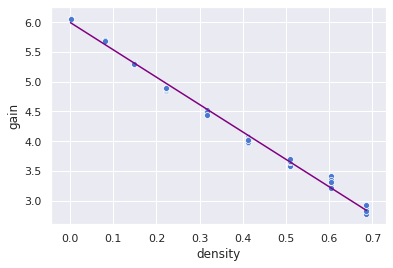

In [315]:
model_log = lm.LinearRegression(fit_intercept=False)
X_log, y_log = gauge[["bias","density"]],np.log(gauge["gain"])
model_log.fit(X_log, y_log)
sns.scatterplot(gauge["density"], y_log)
plt.plot(gauge["density"], model_log.predict(X_log), "purple")

In [316]:
model_log.score(X_log, y_log)

0.995818302485479

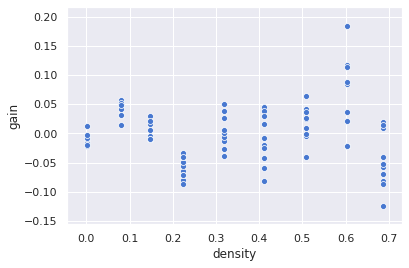

In [317]:
sns.scatterplot(gauge["density"], y_polynomial - model_polynomial.predict(X_polynomial))

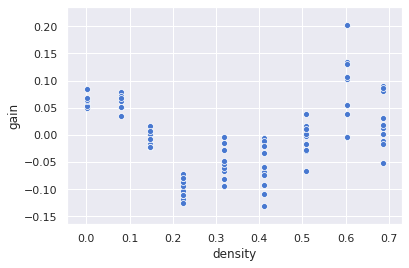

In [318]:
sns.scatterplot(gauge["density"], y_log - model_log.predict(X_log))

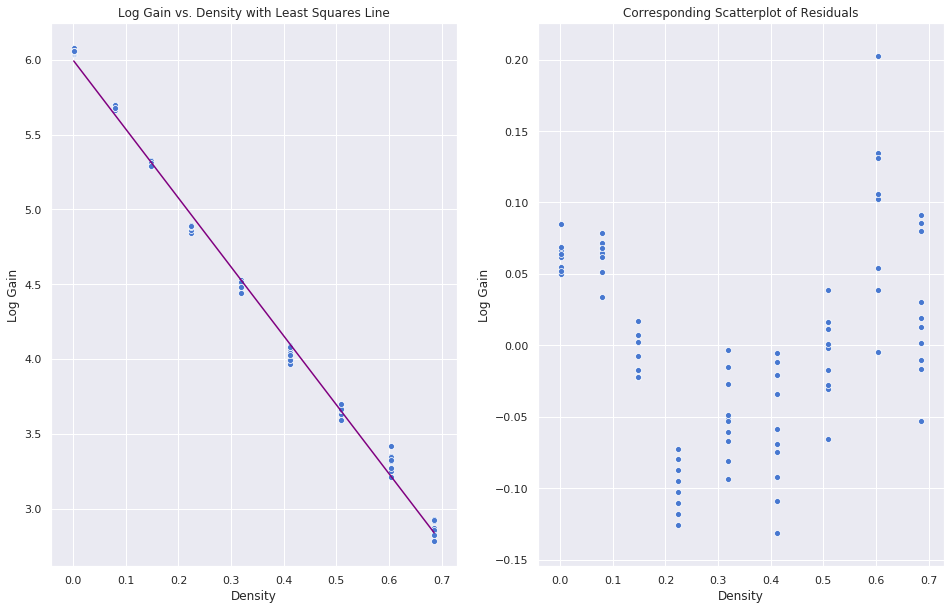

In [319]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.scatterplot(gauge["density"], y_log)
plt.xlabel("Density")
plt.ylabel("Log Gain")
plt.title("Log Gain vs. Density with Least Squares Line")
plt.plot(gauge["density"], model_log.predict(X_log), "purple")
plt.subplot(1,2,2)
sns.scatterplot(gauge["density"], y_log - model_log.predict(X_log))
plt.xlabel("Density")
plt.ylabel("Log Gain")
plt.title("Corresponding Scatterplot of Residuals")
plt.savefig("Figure 6.png", bbox_inches = "tight")

In [280]:
def rmse(y, y_hat):
    return np.sqrt(np.mean((y - y_hat)**2))

In [281]:
rmse(y_log,model_log.predict(X_log))

0.0671593865697819

In [282]:
rmse(y_polynomial,model_polynomial.predict(X_polynomial))

0.04929364728859607

Was considering log -linear since that's what's mentioned in the textbook, but they also admit this is a deliberately simplified model so the truth could very well be 
additionally log-linear residuals are less linear ie centered around 0 suggesting that there are nonlinear interactions the model does not fully capture, while polynomial residuals are more linear

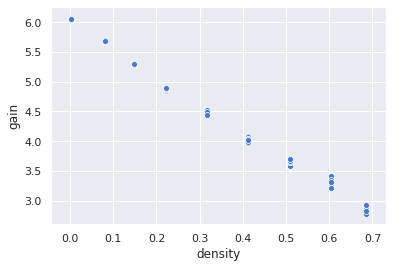

In [283]:
sns.scatterplot(gauge["density"], np.log(gauge["gain"]))

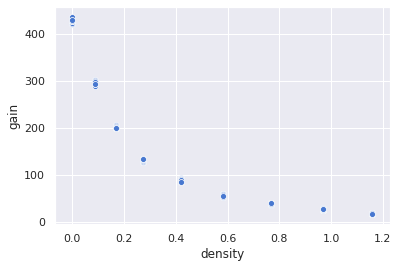

In [284]:
sns.scatterplot(gauge["density"] + gauge["density"] ** 2, (gauge["gain"]))

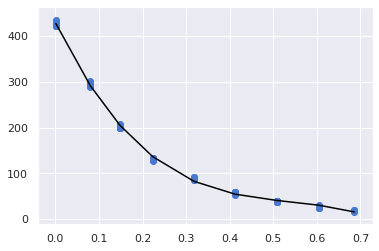

In [285]:
coefs = np.polyfit(gauge["density"], gauge["gain"], 3)
plt.figure()
plt.plot(gauge["density"], np.polyval(coefs, gauge["density"]), color="black")
#plt.title("Polyfit degree "+str(degree))
plt.scatter(gauge["density"],gauge["gain"])
plt.show()